<a href="https://colab.research.google.com/github/nell78/house-analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **실습 내용**

*   삼성전자 갤럭시 출시일에 따른 삼성전자 주가 데이터 변화 추이 시각화
*   출시일 별, 그래프 subplot으로 확인
*   아이폰 출시일에 따른 주가 데이터 변화 추가
*   환율 데이터 추가

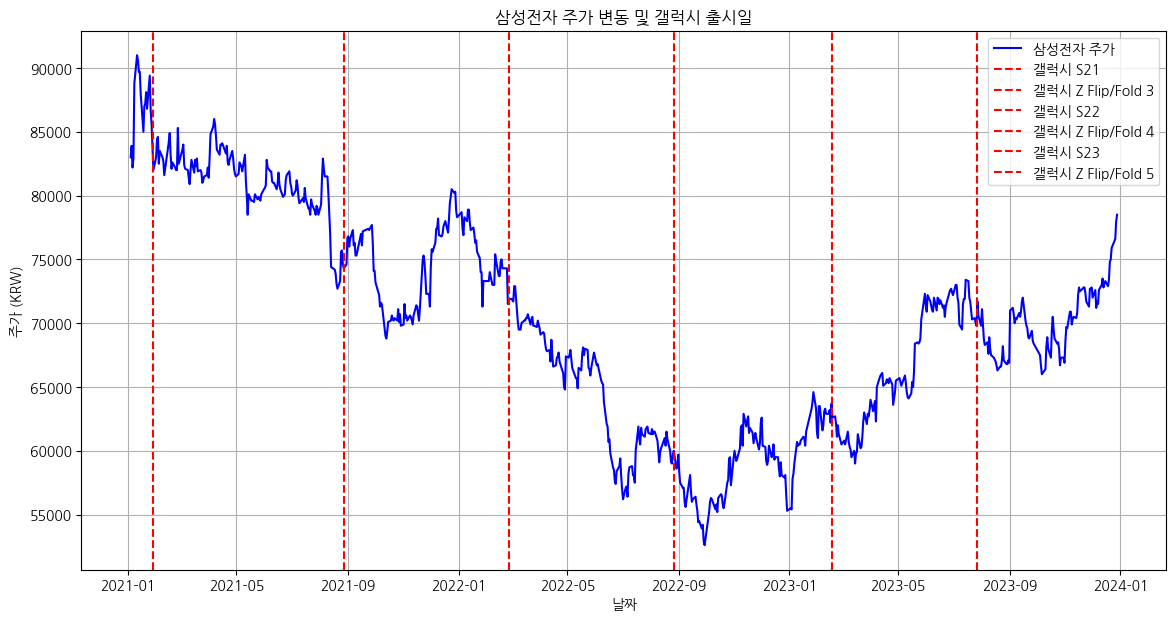

## **실습 순서**
1.   삼성전자 주가 데이터 3년치(2022-01-01~2024-01-01) 불러와서 라인그래프 작성
2.   라인그래프에 출시일 데이터 추가 표시
3.   출시일 기준 (-3일~+7일) 데이터를 plot을 이용하여 한 그래프에 표시
4.   출시일 기준 (-3일~+7일) 데이터를 plot을 이용하여 한 그래프에 표시
5.   경쟁사 / 환율데이터 그래프에 추가하여 표시
---

## 기본설정:

### 필요 모듈 설치

In [ ]:
!pip install yfinance matplotlib pandas
!apt-get -qq install fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 123622 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 필요 모듈 import

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc

### 한글 폰트 설정



In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

## 데이터 설정 :
1. 삼성전자 주가 데이터 불러오기
2. 갤럭시 출시일 설정

In [ ]:
# 삼성전자 주가 데이터 설정
"""
yf.download 모듈 사용하여
삼성전자 주가(005930.KS) 데이터 3년치(2022-01-01 ~ 2024-01-01) 다운로드 하기
"""
df = yf.download('005930.KS', start='2021-01-01', end='2024-01-01')
df.index = df.index.tz_convert('UTC')

# 갤럭시 출시일 설정
launch_galaxy_dates = {
    "갤럭시 S21": "2021-01-29",
    "갤럭시 Z Flip/Fold 3": "2021-08-27",
    "갤럭시 S22": "2022-02-25",
    "갤럭시 Z Flip/Fold 4": "2022-08-26",
    "갤럭시 S23": "2023-02-17",
    "갤럭시 Z Flip/Fold 5": "2023-07-26",
}
launch_dates = {name: pd.to_datetime(date).tz_localize('UTC') for name, date in launch_galaxy_dates.items()}

[*********************100%***********************]  1 of 1 completed


## 데이터 확인 :

In [ ]:
print("데이터 프레임 확인")
print(df.head())

데이터 프레임 확인
Price                         Adj Close     Close      High       Low  \
Ticker                        005930.KS 005930.KS 005930.KS 005930.KS   
Date                                                                    
2021-01-04 00:00:00+00:00  77225.750000   83000.0   84400.0   80200.0   
2021-01-05 00:00:00+00:00  78063.156250   83900.0   83900.0   81600.0   
2021-01-06 00:00:00+00:00  76481.406250   82200.0   84500.0   82100.0   
2021-01-07 00:00:00+00:00  77132.710938   82900.0   84200.0   82700.0   
2021-01-08 00:00:00+00:00  82622.257812   88800.0   90000.0   83000.0   

Price                          Open    Volume  
Ticker                    005930.KS 005930.KS  
Date                                           
2021-01-04 00:00:00+00:00   81000.0  38655276  
2021-01-05 00:00:00+00:00   81600.0  35335669  
2021-01-06 00:00:00+00:00   83300.0  42089013  
2021-01-07 00:00:00+00:00   82800.0  32644642  
2021-01-08 00:00:00+00:00   83300.0  59013307  


In [ ]:
print("갤럭시 런칭 데이터 확인")
print(launch_dates)

갤럭시 런칭 데이터 확인
{'갤럭시 S21': Timestamp('2021-01-29 00:00:00+0000', tz='UTC'), '갤럭시 Z Flip/Fold 3': Timestamp('2021-08-27 00:00:00+0000', tz='UTC'), '갤럭시 S22': Timestamp('2022-02-25 00:00:00+0000', tz='UTC'), '갤럭시 Z Flip/Fold 4': Timestamp('2022-08-26 00:00:00+0000', tz='UTC'), '갤럭시 S23': Timestamp('2023-02-17 00:00:00+0000', tz='UTC'), '갤럭시 Z Flip/Fold 5': Timestamp('2023-07-26 00:00:00+0000', tz='UTC')}


## 데이터 시각화(1) :
1. 삼성전자 주가 line 그래프 그리기
2. 그래프 내, 출시일 표시
3. 그래프 제목 설정 : "갤럭시 출시에 따른 삼성전자 주가 변동 그래프"
4. x축 레이블 : "날짜"
5. y축 레이블 : "주가 (KRW)"
6. 범례(legend) 추가
7. 그리드(grid) 추가

## 예시 결과 :
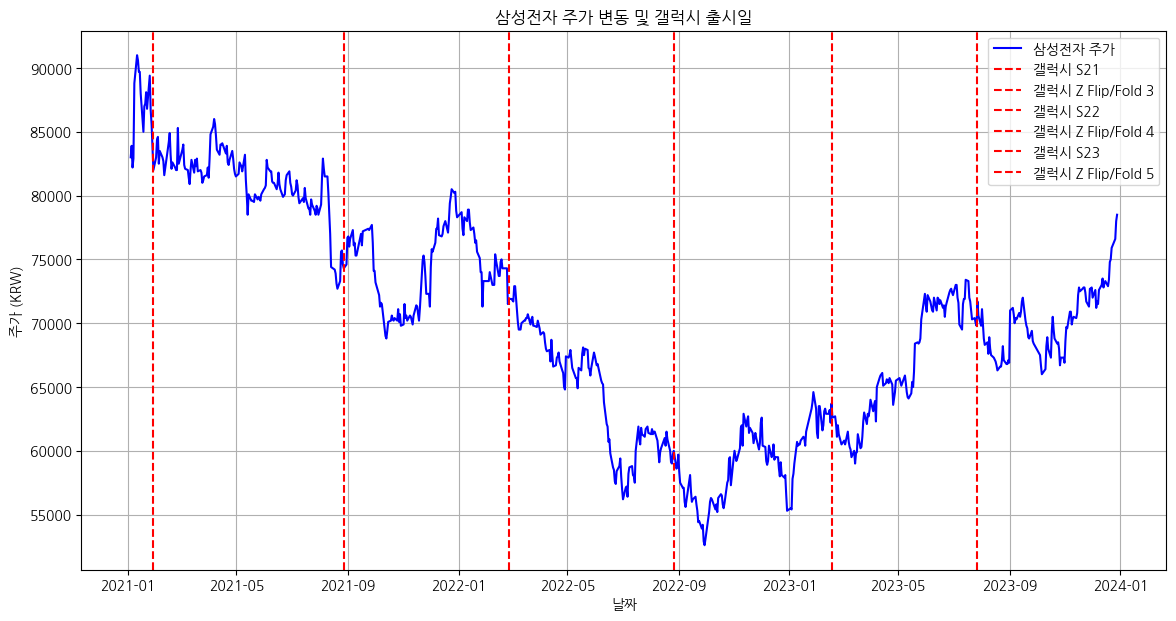

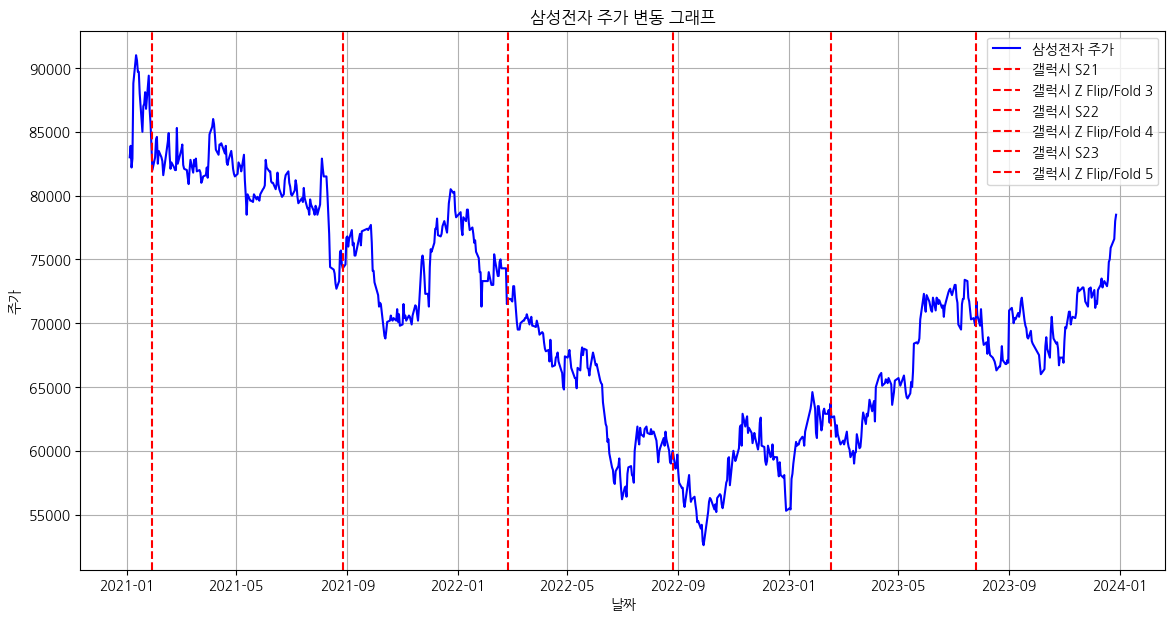

In [ ]:
# 코드 작성
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'], label="삼성전자 주가", color='blue')

for name, date in launch_dates.items():
    plt.axvline(x=date, linestyle='--', color='red', label=name)

plt.title('삼성전자 주가 변동 그래프')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.grid()
plt.show()


## 데이터 시각화(2) :
1. 각 출시일에 대한 서브플롯 생성
2. 각 출시일 날짜 기준 (-3일, +7일) 데이터 생성
    (plt.axvline() 함수 사용)
3. 위 데이터 기준 서브플롯 그래프 그리기
4. 각 그래프 제목 및 레이블, 범례, 그리드 설정

## 예시 결과 :
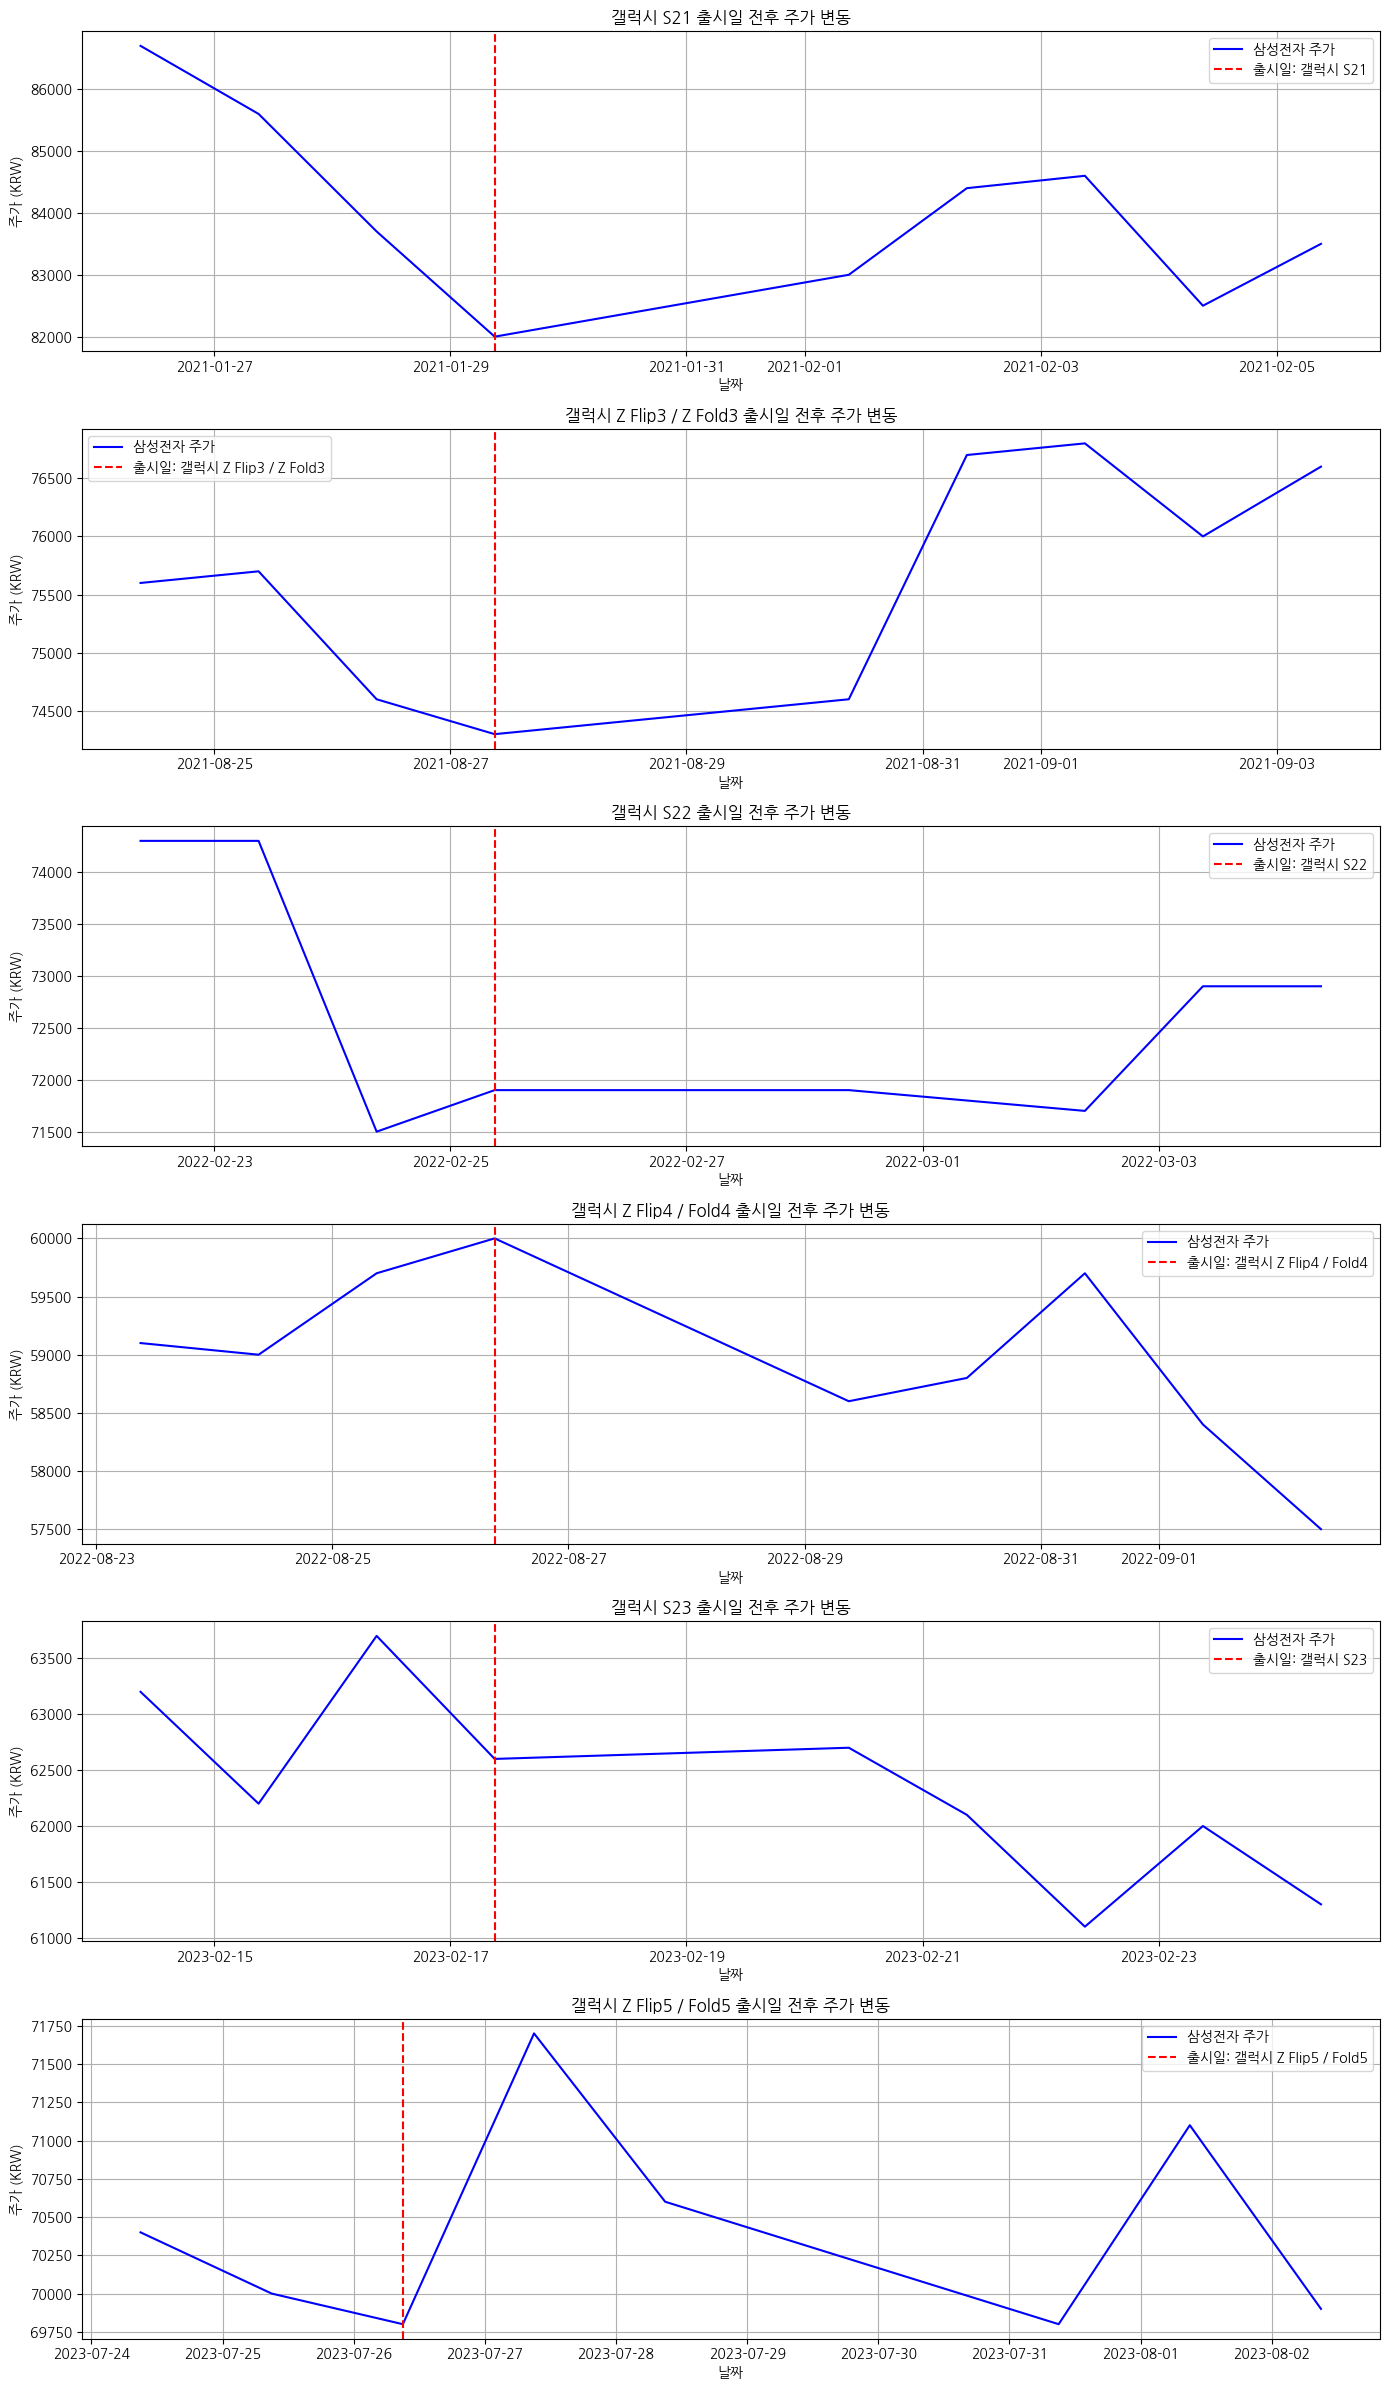

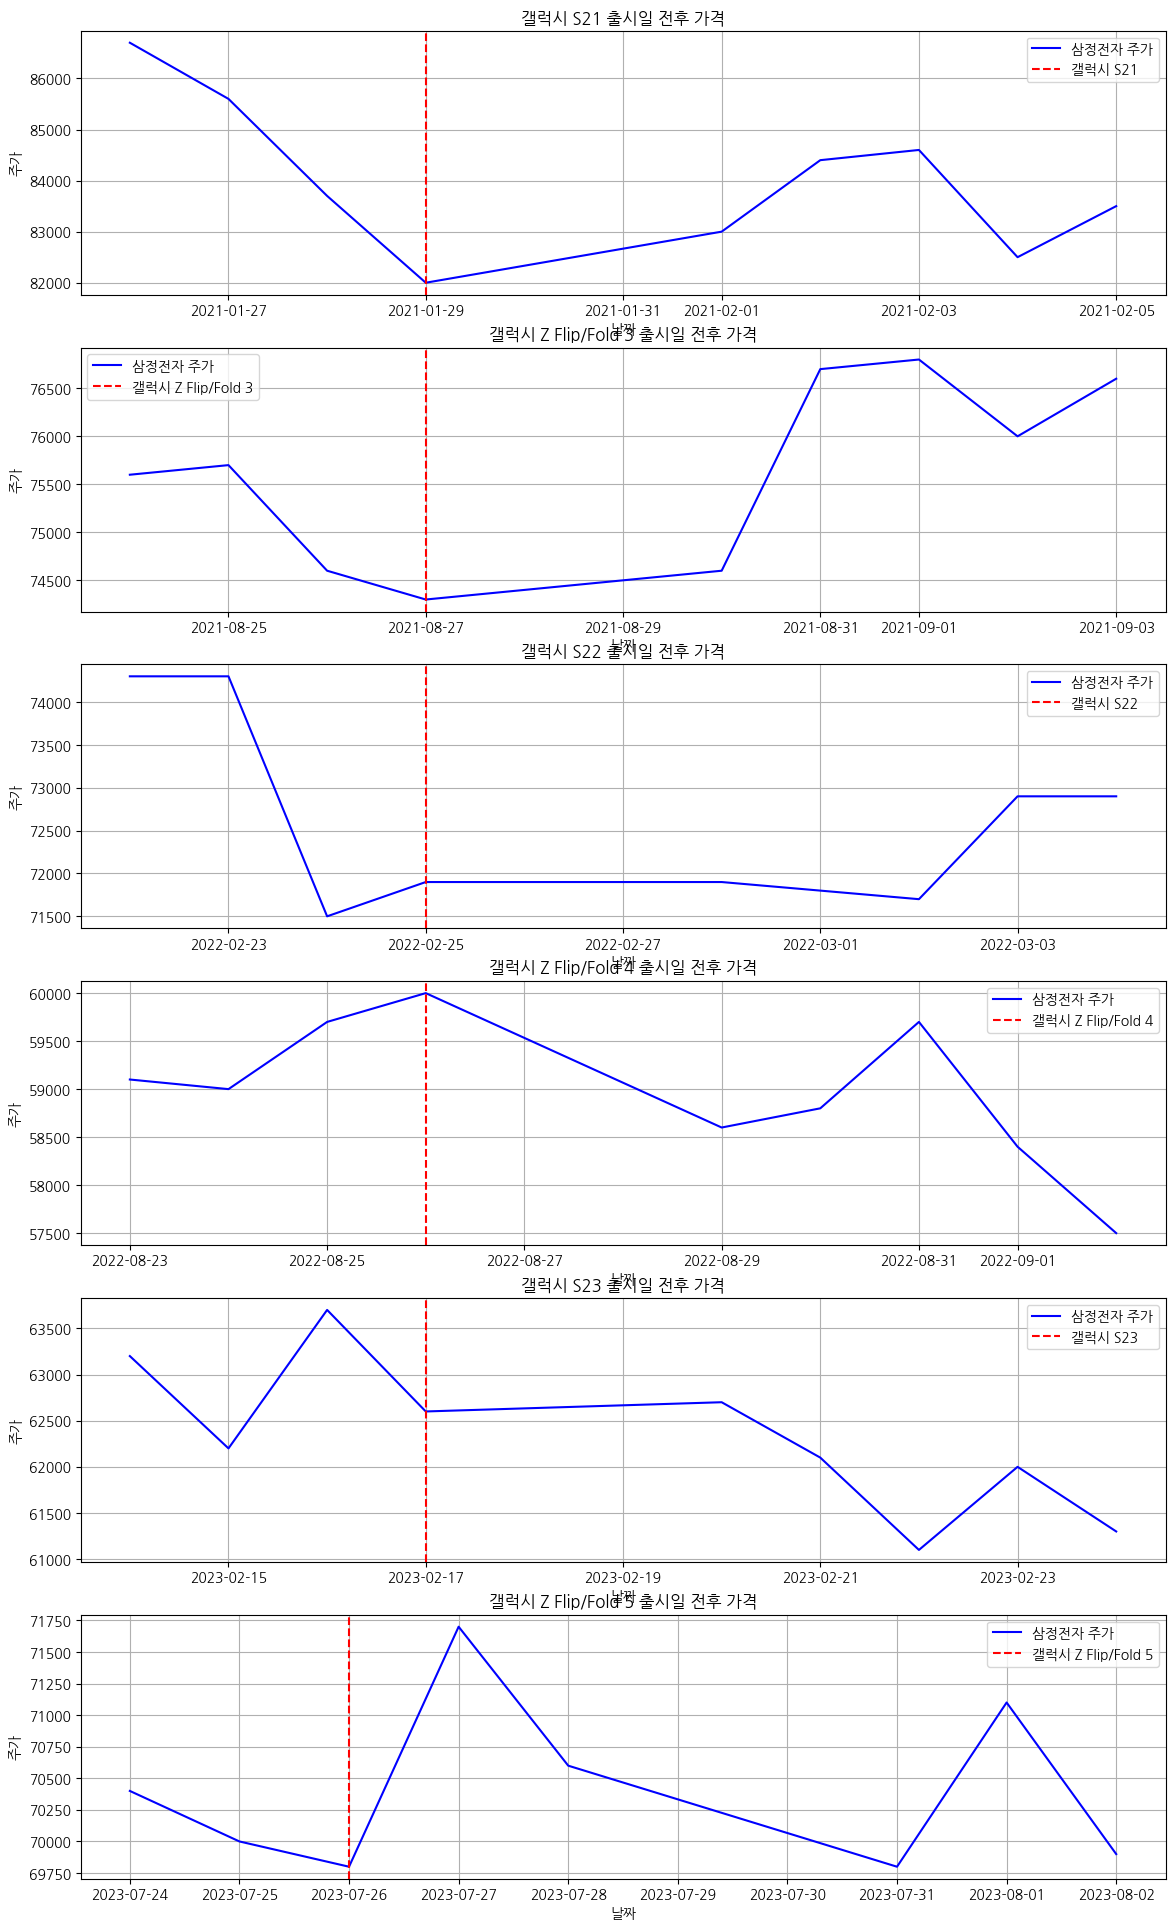

In [ ]:
# 코드 작성
num_lauches = len(launch_dates)
fig, axes = plt.subplots(num_lauches, 1, figsize=(14, num_lauches * 4))

for ax, (name, date) in zip(axes, launch_dates.items()):
    start_date = date - pd.Timedelta(days=3)
    end_date = date + pd.Timedelta(days=7)

    sub_df = df.loc[start_date:end_date]

    ax.plot(sub_df.index, sub_df['Close'], label='삼정전자 주가', color='blue')
    ax.axvline(x=date, linestyle='--', color='red', label=name)

    ax.set_title(f'{name} 출시일 전후 가격')
    ax.set_xlabel('날짜')
    ax.set_ylabel('주가')
    ax.legend()
    ax.grid()

plt.show()

## 데이터 시각화(3) :
1. 경쟁사 아이폰 출시일도 표시
2. 환율 데이터도 추가하여 y축에 표시 (twinx() 함수 사용)

## 예시 결과 :
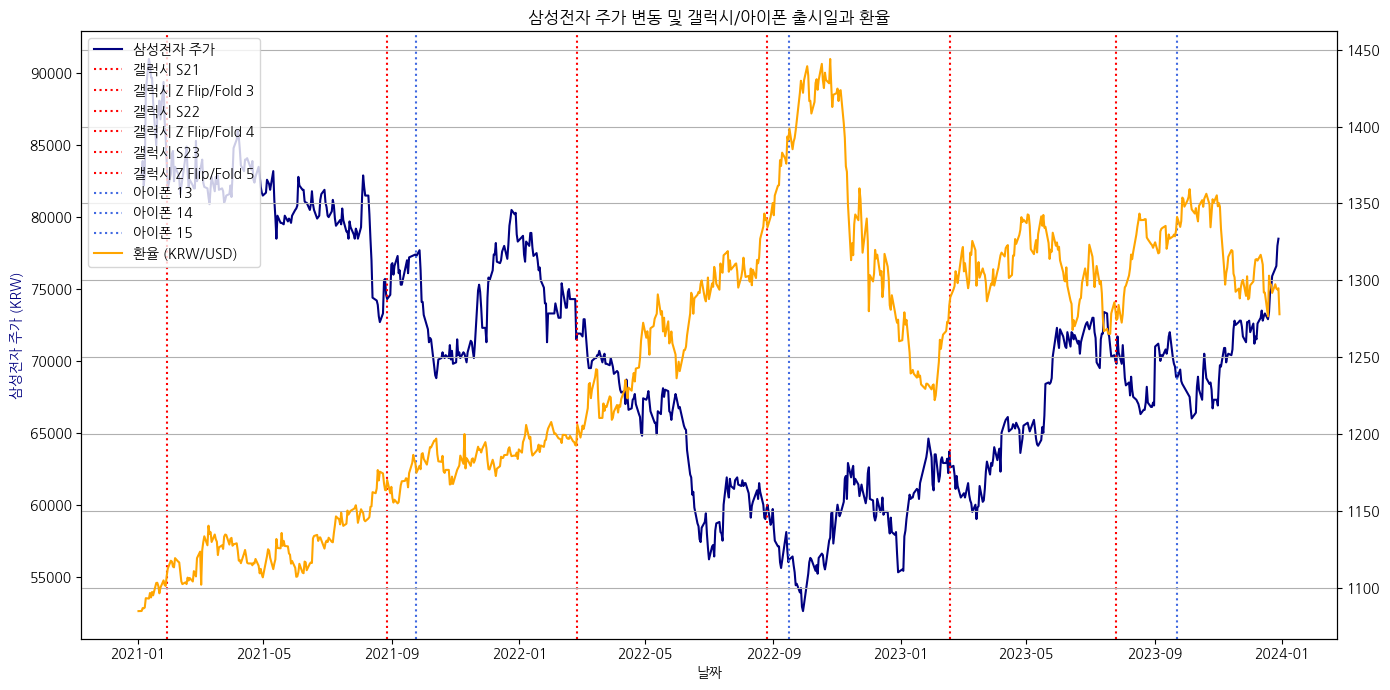

In [ ]:
galaxy_launch = {
    "갤럭시 S21": "2021-01-29",
    "갤럭시 Z Flip/Fold 3": "2021-08-27",
    "갤럭시 S22": "2022-02-25",
    "갤럭시 Z Flip/Fold 4": "2022-08-26",
    "갤럭시 S23": "2023-02-17",
    "갤럭시 Z Flip/Fold 5": "2023-07-26",
}
iphone_launch = {
    "아이폰 13": "2021-09-24",
    "아이폰 14": "2022-09-16",
    "아이폰 15": "2023-09-22",
}

galaxy_launch_dates = {name: pd.to_datetime(date).tz_localize('UTC') for name, date in galaxy_launch.items()}
iphone_launch_dates = {name: pd.to_datetime(date).tz_localize('UTC') for name, date in iphone_launch.items()}

exchange_rate = yf.download('KRW=X', start='2021-01-01', end='2024-01-01')
exchange_rate.index = exchange_rate.index.tz_convert('UTC')

[*********************100%***********************]  1 of 1 completed


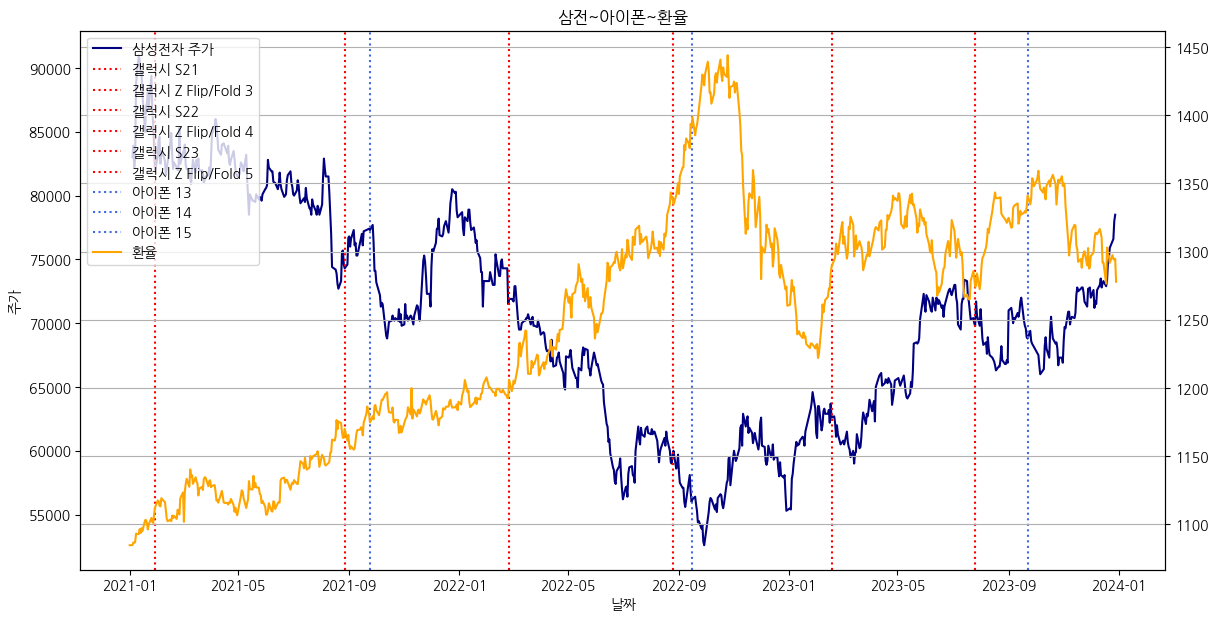

In [ ]:
# 코드 작성
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(df.index, df['Close'], label='삼성전자 주가', color='navy')
ax1.set_xlabel('날짜')
ax1.set_ylabel('주가')

for name, date in galaxy_launch_dates.items():
    plt.axvline(x=date, linestyle=':', color='red', label=name)

for name, date in iphone_launch_dates.items():
    plt.axvline(x=date, linestyle=':', color='royalblue', label=name)

ax2 = ax1.twinx()
ax2.plot(exchange_rate.index, exchange_rate['Close'], label='환율', color='orange')

plt.title('삼전~아이폰~환율')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2

plt.legend(handles, labels)

plt.grid()
plt.show()